ID	Name

_

19015357 احمد محمود السعيد جاب الله


19015894	عبدالرحمن السيد جاد السيد

## Data load and libraries import

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics.pairwise import rbf_kernel
from scipy.sparse.csgraph import laplacian
from math import*
from sklearn.model_selection import train_test_split

In [2]:
def readFile(fileName) :
    data = pd.read_csv(fileName, header=None)
    data.rename(columns = {41:'label'}, inplace = True)
    return data

In [3]:
training_data = readFile("kddcup.data_10_percent_corrected")


The catigorical data is columns 1, 2, 3, label

In [6]:
columns = [1, 2, 3, "label"]
les = []
for c in columns:
    print("changing column ", c)
    le = preprocessing.LabelEncoder()
    le.fit(training_data[c])
    print(); print(list(le.classes_))
    print(len(le.classes_), " catigories")
    les.append(le)
    training_data[c] = le.transform(training_data[c])
    print()


changing column  1

[0, 1, 2]
3  catigories

changing column  2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]
66  catigories

changing column  3

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
11  catigories

changing column  label

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
23  catigories



In [15]:
training_data

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,11
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,11
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,11
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,11
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,22,9,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,11
494017,0,1,22,9,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,11
494018,0,1,22,9,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,11
494019,0,1,22,9,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,11


In [6]:
print(np.array(les[3].classes_))

['back.' 'buffer_overflow.' 'ftp_write.' 'guess_passwd.' 'imap.'
 'ipsweep.' 'land.' 'loadmodule.' 'multihop.' 'neptune.' 'nmap.' 'normal.'
 'perl.' 'phf.' 'pod.' 'portsweep.' 'rootkit.' 'satan.' 'smurf.' 'spy.'
 'teardrop.' 'warezclient.' 'warezmaster.']


## Kmeans

In [7]:
np.random.seed(42)

In [8]:
def KMeans(D, k, ep = 0.01 , T=300):
    mu_t = D[np.random.choice(D.shape[0], k, replace=False)]
    labels = np.zeros(D.shape[0])
    for i in range(T):

        labels = np.argmin( ( (D[:, :, None] - mu_t.T[None, :, :])**2 ).sum(axis=1), axis=1)

        mu_t2 = np.zeros(mu_t.shape)
        for j in range(k):
            Dj = D[labels == j]
            if len(Dj) != 0:
                mu_t2[j] = np.array([Dj.mean(axis=0)])
            else:
                mu_t2[j] = mu_t[j] 
        
        e = ((mu_t - mu_t2)**2).sum()
        print("__________ t = ", i, "__________ ")
        print("e = " , e)

        if e < ep :
            break
        
        mu_t = mu_t2

    return mu_t, labels

In [11]:
#all, X_train, ally, y_train = train_test_split(training_data.drop(["label"],axis=1),training_data["label"].to_numpy() , test_size=0.1, stratify=training_data["label"])

In [9]:
y_training = training_data["label"].to_numpy()


In [76]:
centroidsK7, labelsK7 = KMeans(training_data.drop(["label"],axis=1).to_numpy(), 7)

__________ t =  0 __________ 
e =  175999681.9080384
__________ t =  1 __________ 
e =  70725701787.97876
__________ t =  2 __________ 
e =  82576904526158.67
__________ t =  3 __________ 
e =  52714221732546.95
__________ t =  4 __________ 
e =  4.5801983591847526e+17
__________ t =  5 __________ 
e =  9812701233463.748
__________ t =  6 __________ 
e =  2350426722756.07
__________ t =  7 __________ 
e =  440199569838.1727
__________ t =  8 __________ 
e =  508227951.261252
__________ t =  9 __________ 
e =  1200089832.9618812
__________ t =  10 __________ 
e =  9623887410.215227
__________ t =  11 __________ 
e =  56987901604.052
__________ t =  12 __________ 
e =  100159051464.45145
__________ t =  13 __________ 
e =  157924985345.11893
__________ t =  14 __________ 
e =  44291815900.72691
__________ t =  15 __________ 
e =  10954065742.796772
__________ t =  16 __________ 
e =  10012149049.902782
__________ t =  17 __________ 
e =  2248990171.9359856
__________ t =  18 __________ 


In [98]:
centroidsK15, labelsK15 = KMeans(training_data.drop(["label"],axis=1).to_numpy(), 15)

__________ t =  0 __________ 
e =  178667840778.20273
__________ t =  1 __________ 
e =  70977823036971.38
__________ t =  2 __________ 
e =  60727496789291.76
__________ t =  3 __________ 
e =  4.580186366707892e+17
__________ t =  4 __________ 
e =  8712534222553.532
__________ t =  5 __________ 
e =  3042678838995.391
__________ t =  6 __________ 
e =  1356136996548.8152
__________ t =  7 __________ 
e =  1000472624644.5317
__________ t =  8 __________ 
e =  165669496599.7316
__________ t =  9 __________ 
e =  2414545694.6322975
__________ t =  10 __________ 
e =  21761970492.327496
__________ t =  11 __________ 
e =  74176361306.31607
__________ t =  12 __________ 
e =  177091172981.52878
__________ t =  13 __________ 
e =  104927584854.76918
__________ t =  14 __________ 
e =  28705115135.745346
__________ t =  15 __________ 
e =  5605690968.877946
__________ t =  16 __________ 
e =  7639975891.397021
__________ t =  17 __________ 
e =  6618619117.209622
__________ t =  18 _______

In [107]:
centroidsK23, labelsK23 = KMeans(training_data.drop(["label"],axis=1).to_numpy(), 23)

__________ t =  0 __________ 
e =  667277950.4043051
__________ t =  1 __________ 
e =  176318720443.68994
__________ t =  2 __________ 
e =  111021479623933.62
__________ t =  3 __________ 
e =  4.6565975509283174e+17
__________ t =  4 __________ 
e =  5674654365081.006
__________ t =  5 __________ 
e =  4244191559468.0947
__________ t =  6 __________ 
e =  1824541953503.9526
__________ t =  7 __________ 
e =  880165435446.08
__________ t =  8 __________ 
e =  438945041389.9199
__________ t =  9 __________ 
e =  2801058998.6496806
__________ t =  10 __________ 
e =  28370271194.166172
__________ t =  11 __________ 
e =  69713181219.20334
__________ t =  12 __________ 
e =  187133317168.52887
__________ t =  13 __________ 
e =  92655663707.34093
__________ t =  14 __________ 
e =  30267165299.590633
__________ t =  15 __________ 
e =  20340260712.123642
__________ t =  16 __________ 
e =  6142292413.527969
__________ t =  17 __________ 
e =  2959091758.908329
__________ t =  18 _______

In [81]:
centroidsK31, labelsK31 = KMeans(training_data.drop(["label"],axis=1).to_numpy(), 31)

__________ t =  0 __________ 
e =  1685517390.2167516
__________ t =  1 __________ 
e =  111747628643.94336
__________ t =  2 __________ 
e =  83096084456703.98
__________ t =  3 __________ 
e =  54413900074333.75
__________ t =  4 __________ 
e =  4.5801953801870285e+17
__________ t =  5 __________ 
e =  9123169613670.502
__________ t =  6 __________ 
e =  1419066849551.213
__________ t =  7 __________ 
e =  11530826686.729786
__________ t =  8 __________ 
e =  61983081785.7652
__________ t =  9 __________ 
e =  107513945224.47499
__________ t =  10 __________ 
e =  159705581855.79816
__________ t =  11 __________ 
e =  49184610141.05042
__________ t =  12 __________ 
e =  8246043200.122599
__________ t =  13 __________ 
e =  11238719328.276108
__________ t =  14 __________ 
e =  6708363024.693635
__________ t =  15 __________ 
e =  4821570745.9752245
__________ t =  16 __________ 
e =  8811336955.133694
__________ t =  17 __________ 
e =  9366600739.662384
__________ t =  18 ________

In [91]:
centroidsK45, labelsK45 = KMeans(training_data.drop(["label"],axis=1).to_numpy(), 45)

__________ t =  0 __________ 
e =  36094762761.51555
__________ t =  1 __________ 
e =  75744529711481.17
__________ t =  2 __________ 
e =  60079619262427.13
__________ t =  3 __________ 
e =  4.58020417985049e+17
__________ t =  4 __________ 
e =  9721708953490.496
__________ t =  5 __________ 
e =  2116194069145.1887
__________ t =  6 __________ 
e =  61752311801.79339
__________ t =  7 __________ 
e =  70147560162.09364
__________ t =  8 __________ 
e =  104868617387.52724
__________ t =  9 __________ 
e =  177362366188.13364
__________ t =  10 __________ 
e =  33446217187.739456
__________ t =  11 __________ 
e =  5816056293.64155
__________ t =  12 __________ 
e =  13421908055.488565
__________ t =  13 __________ 
e =  7894661540.469749
__________ t =  14 __________ 
e =  10437135567.747877
__________ t =  15 __________ 
e =  8601262215.915157
__________ t =  16 __________ 
e =  2678418161.0422096
__________ t =  17 __________ 
e =  1808705076.7540264
__________ t =  18 _________

In [118]:
centroids_k = [centroidsK7, centroidsK15, centroidsK23, centroidsK31, centroidsK45]
labels_k = [labelsK7, labelsK15, labelsK23, labelsK31, labelsK45]
ks = [7,15,23,31,45]

# Evaluation
Precision
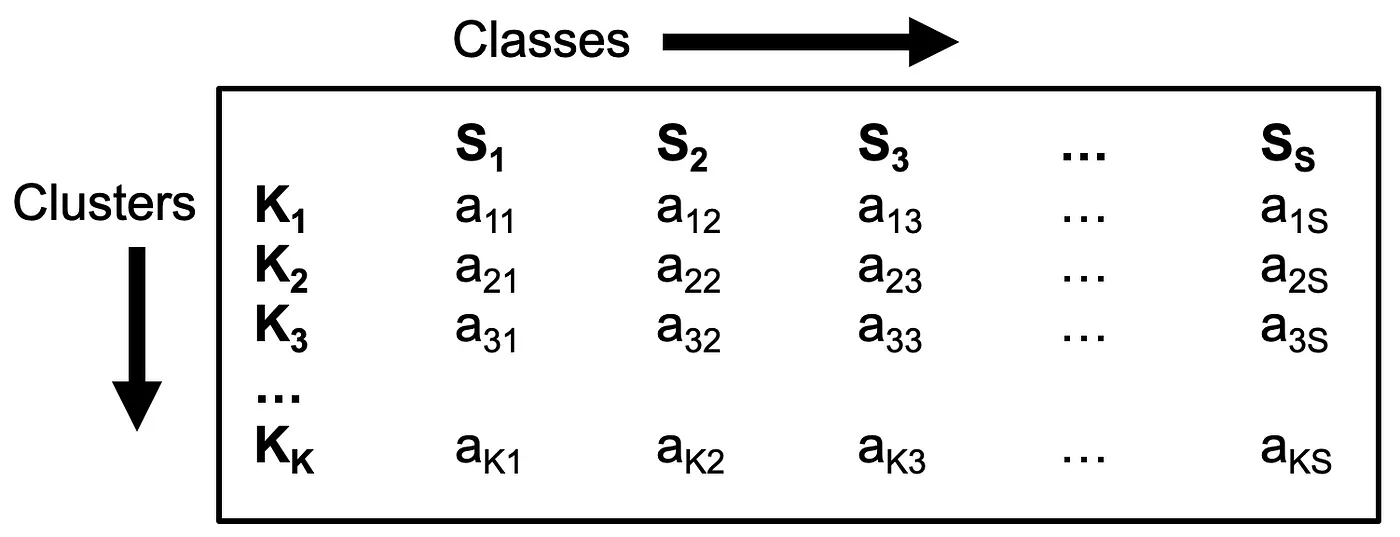

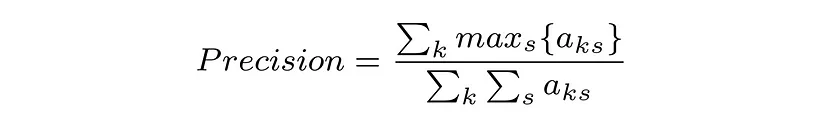

In [19]:
def get_A(labels, y_true):
    labels_uniqe = np.unique(labels)    
    true_uniqe = np.unique(y_true)

    # build A 2D array
    A = np.zeros((len(labels_uniqe), len(true_uniqe)))
    for k in range(len(labels_uniqe)):
        for s in range(len(true_uniqe)):
            A[k,s] = np.sum(np.logical_and(labels == labels_uniqe[k], y_true == true_uniqe[s]))
    
    return A


In [20]:
def precision(labels, y_true, A=None):
    # Tp / (Tp + Fp)

    if A is None:
        A = get_A(labels, y_true)

    k_to_y = np.argmax(A, axis=1)
    Tp = np.zeros(A.shape[0])
    Fp = np.zeros(A.shape[0])
    for k in range(A.shape[0]):
        Tp[k] = A[k, k_to_y[k]]
        Fp[k] = np.sum([A[k,x] for x in range(A.shape[1]) if x != k_to_y[k]])

        
    precision = Tp / (Tp+Fp)
    return precision

In [21]:
def recall(labels, y_true, A=None):
    # Tp / (Tp + Fn)

    if A is None:
        A = get_A(labels, y_true)

    k_to_y = np.argmax(A, axis=1)
    Tp = np.zeros(A.shape[0])
    Fn = np.zeros(A.shape[0])
    for k in range(A.shape[0]):
        Tp[k] = A[k, k_to_y[k]]
        Fn[k] = np.sum([A[x,k_to_y[k]] for x in range(A.shape[0]) if x !=k ])
        
    precision = Tp / (Tp+Fn)
    return precision

In [22]:
def F1(labels, y_true, A=None):
    # 2 * P*R/(P+R)

    if A is None:
        A = get_A(labels, y_true)

    P = precision(labels, y_true, A)
    R = recall(labels, y_true, A)
    F1 = 2 * P*R/(P+R)
    return F1

In [16]:
for j in range(5):
    print("________ k = ", ks[j], "________")

    print("precision")
    print(precision(labels_k[j], y_training))
    print("recall")
    print(recall(labels_k[j], y_training))
    print("F1")
    print(F1(labels_k[j], y_training))


Normalized Cut

In [10]:
X_train, X_test = train_test_split(
    training_data, train_size=0.015, random_state=42, stratify=training_data["label"])
del X_test
y_train = X_train["label"].to_numpy()
X_train = X_train.drop(["label"], axis=1).to_numpy()

In [11]:
print(X_train.shape)

(7410, 41)


In [12]:
def normalized_cut(k):
    # Compute the Similarity matrix
    similarity_matrix = rbf_kernel(X_train)
    np.fill_diagonal(similarity_matrix, 0)

    # Compute the Laplacian matrix
    La = laplacian(similarity_matrix, normed=True)

    # Compute the eigenvectors of the Laplacian matrix
    _, eigenvecs = np.linalg.eigh(La)
    
    # Compute the k-means clustering of the normalized eigenvectors
    _, labels = KMeans(eigenvecs[:, :k], k)
    return labels

In [13]:
def assign_labels(y_true, y_pred):
    # Create a dictionary to map predicted labels to true labels
    label_map = {}
    for i in range(len(y_pred)):
        label_map[y_pred[i]] = y_true[i]

    # Assign each predicted label a true label
    new_y_pred = []
    for label in y_pred:
        new_y_pred.append(label_map[label])
    return new_y_pred

In [14]:
predicted_labels = normalized_cut(11)
predicted_labels = assign_labels(y_train, predicted_labels)
print(predicted_labels)
print(y_train)

__________ t =  0 __________ 
e =  0.002494750445064995
[ 6  2  5 ... 10 10 10]
[9, 18, 11, 9, 10, 5, 11, 18, 18, 5, 5, 11, 9, 18, 18, 18, 10, 9, 9, 10, 18, 18, 9, 5, 11, 11, 9, 9, 11, 11, 9, 18, 11, 5, 5, 10, 9, 11, 11, 9, 9, 11, 18, 11, 10, 10, 18, 11, 9, 11, 9, 11, 11, 18, 5, 10, 11, 9, 11, 18, 9, 9, 9, 18, 10, 11, 18, 18, 18, 9, 11, 11, 11, 18, 5, 11, 9, 11, 18, 9, 11, 18, 18, 18, 18, 5, 18, 11, 5, 11, 10, 11, 11, 5, 11, 10, 11, 5, 11, 9, 18, 5, 18, 18, 18, 9, 5, 18, 18, 18, 5, 18, 5, 9, 18, 11, 11, 18, 18, 11, 18, 11, 11, 5, 18, 10, 10, 18, 18, 18, 18, 9, 18, 10, 5, 11, 18, 11, 18, 18, 11, 11, 18, 11, 11, 9, 18, 5, 18, 5, 10, 18, 11, 18, 11, 11, 9, 5, 9, 9, 11, 5, 11, 18, 11, 11, 18, 10, 18, 18, 11, 11, 18, 11, 10, 18, 11, 11, 9, 18, 18, 9, 18, 18, 11, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 11, 5, 18, 18, 18, 18, 11, 18, 18, 18, 18, 9, 5, 18, 10, 11, 11, 5, 9, 11, 11, 11, 9, 11, 11, 11, 5, 11, 11, 9, 18, 18, 5, 18, 10, 18, 5, 9, 18, 5, 18, 18, 18, 5, 18, 11, 11, 18, 9, 18, 18, 11

In [16]:
# Identify anomalies
anomalies = 0
for i in range(len(predicted_labels)):
    if predicted_labels[i] != 11:
        anomalies = anomalies + 1

print("Number of detected anomalies: ", anomalies)

Number of detected anomalies:  5215


In [17]:
from sklearn.metrics import f1_score
#  Evaluate the performance of the normalized cut algorithm
score_nc = f1_score(y_train, predicted_labels, average='micro')
print(f"Micro-averaged F1 score for N-C: {score_nc}")

Micro-averaged F1 score for N-C: 0.642914979757085


In [23]:
# Compute the precision, recall, and F1 score for the normalized cut algorithm
print("precision")
print(precision(predicted_labels, y_train))
print("recall")
print(recall(predicted_labels, y_train))
print("F1")
print(F1(predicted_labels, y_train))

precision
[0.86354167 0.87091757 0.91383812 0.51116173 0.97022428]
recall
[0.19681861 0.69651741 0.21766169 0.76901988 0.59567901]
F1
[0.32057231 0.7740152  0.35158212 0.61412151 0.73815828]


# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)


In [8]:
def dbscan(data, eps, min_pts):
    '''
    DBSCAN clustering algorithm
    data: numpy array of data points
    eps: distance threshold
    min_pts: minimum number of points in a cluster
    returns: array of labels 
    '''
    labels = np.zeros(data.shape[0]) # initialize all points as noise
    cluster_id = 0

    # Find core points
    for i in range(data.shape[0]):
        if labels[i] != 0:
            continue
        neighbors = find_neighbors(data, i, eps)
        if len(neighbors) < min_pts:
            labels[i] = -1 # mark as noise
        else:
            cluster_id += 1
            labels[i] = cluster_id
            expand_cluster(data, labels, i, neighbors, cluster_id, eps, min_pts)

    return labels

def find_neighbors(data, i, eps):
    '''
    Find all points in the dataset within a distance eps of point i
    '''
    return [j for j in range(data.shape[0]) if np.linalg.norm(data[i]-data[j]) < eps]

def expand_cluster(data, labels, i, neighbors, cluster_id, eps, min_pts):
    '''
    Recursive function to expand a cluster around a core point
    '''
    for j in neighbors:
        if labels[j] == -1: # skip noise points
            continue
        if labels[j] == 0:
            labels[j] = cluster_id
            new_neighbors = find_neighbors(data, j, eps)
            if len(new_neighbors) >= min_pts:
                neighbors += new_neighbors
        else:
            continue
        

In [26]:
from sklearn.cluster import KMeans

# Set the random seed
np.random.seed(42)

# Split the training dataset into 0.5% training and 99.5% test 
X_train, X_test = train_test_split(
    training_data, train_size=0.01, random_state=42, stratify=training_data['label'])
del X_test
true_labels = X_train.values[:,-1]
X_train = X_train.values[:,:-1]
print(X_train)
# apply dbscan on the training data
eps = 15
min_pts = 3
dbscan_labels = dbscan(X_train, eps, min_pts)

n_clusters = 23

kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_train)

# Assign the dbscan labels to the true labels
true_labels_dbscan = assign_labels(true_labels, dbscan_labels)
# Assign the kmeans labels to the true labels
true_labels_kmeans = assign_labels(true_labels, kmeans_labels)

# Compute the micro-averaged F1 score for the clustering
score_dbscan = F1(true_labels, true_labels_dbscan)
score_kmeans = F1(true_labels, true_labels_kmeans)
print(f"Micro-averaged F1 score for DBSCAN: {score_dbscan}")
print(f"Micro-averaged F1 score for KMeans: {score_kmeans}")

[[ 0.  0. 14. ...  0.  0.  0.]
 [ 0.  1. 45. ...  1.  0.  0.]
 [ 0.  1. 22. ...  0.  0.  0.]
 ...
 [ 0.  0. 13. ...  0.  0.  0.]
 [ 0.  0. 14. ...  0.  0.  0.]
 [ 0.  0. 14. ...  0.  0.  0.]]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Micro-averaged F1 score for DBSCAN: [0.84210526 0.00198216 0.01567091 0.98630137 0.0039604  0.9550732
 0.00593472 0.45714286 0.81481481 0.99910889 0.01964637 0.01964637]
Micro-averaged F1 score for KMeans: [1.         0.00145349 0.01873199 0.87617491 0.00290487 0.79901961
 0.002079   0.01444043 0.02300503 0.98646986 0.01444043 0.02092676]
